<a href="https://colab.research.google.com/github/vhiotirta22/OperasiEdgeDetection/blob/main/Praktikum4_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/bebek.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# **Laplacian**

In [ ]:
laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# **Roberts**

In [ ]:
roberts_kernel_x = np.array([[1, 0], [-1, 0]])
roberts_kernel_y = np.array([[0, 1], [0, -1]])
roberts_x = cv2.filter2D(gray_img, cv2.CV_32F, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_img, cv2.CV_32F, roberts_kernel_y)
roberts = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)

# **Prewitt**

In [ ]:
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(gray_img, cv2.CV_32F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_img, cv2.CV_32F, prewitt_kernel_y)
prewitt = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

# **Sobel**

In [ ]:
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# **Canny**

In [ ]:
canny = cv2.Canny(img, 100, 200)

# **Menampilkan gambar**

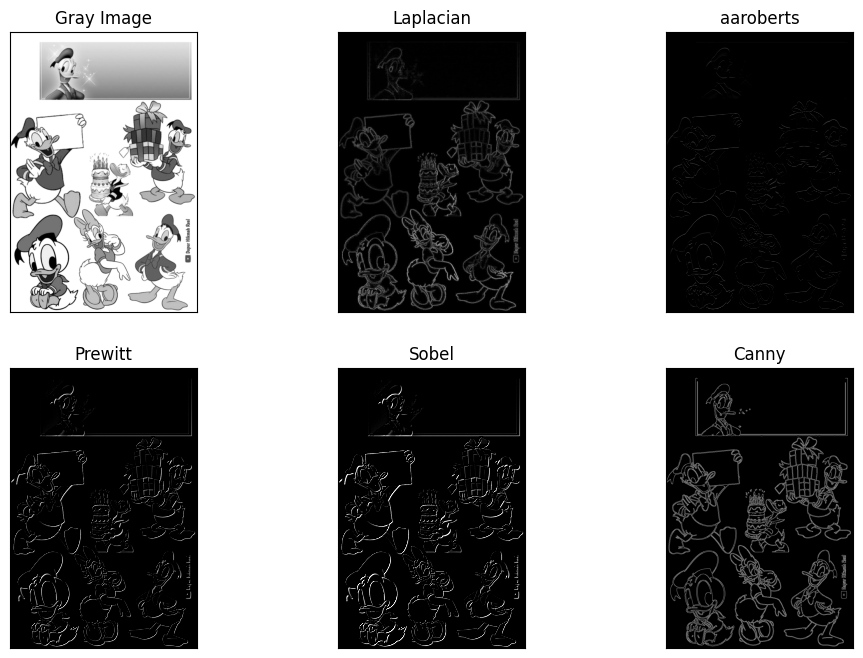

In [ ]:
titles = ['Gray Image', 'Laplacian', 'aaroberts', 'Prewitt', 'Sobel', 'Canny']
images = [gray_img, laplacian, roberts, prewitt, sobel, canny]

fig, axes = plt.subplots(2,3, figsize=(12, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.2)

for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(images[i], 'gray', vmin=0, vmax=255)
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()